<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загружаем-данные" data-toc-modified-id="Загружаем-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загружаем данные</a></span><ul class="toc-item"><li><span><a href="#Заполняем-пропущенные-значение" data-toc-modified-id="Заполняем-пропущенные-значение-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Заполняем пропущенные значение</a></span></li><li><span><a href="#Выполняем-преобразование-признаков" data-toc-modified-id="Выполняем-преобразование-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выполняем преобразование признаков</a></span></li></ul></li><li><span><a href="#Обучаем-модель" data-toc-modified-id="Обучаем-модель-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучаем модель</a></span></li><li><span><a href="#Смотрим-на-метрики" data-toc-modified-id="Смотрим-на-метрики-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Смотрим на метрики</a></span></li></ul></div>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

from sklearn.preprocessing import minmax_scale

In [5]:
from helpers import plot_roc_curve

In [6]:
%matplotlib inline

*Применение алгоритмов машинного обучения для задачи банковского скоринга*

Описание полей:
* SeriousDlqin2yrs - Флаг выхода на просрочку через 90 дней
* RevolvingUtilizationOfUnsecuredLines - Общий баланс по кредитным картам и личным кредитным линиям, за исключением недвижимости, и без задолженности по кредитам, таким как автокредиты, деленные на сумму кредитных лимитов
* age - Возраст заёмщика в годах
* NumberOfTime30-59DaysPastDueNotWorse - Сколько раз заемщик просрочил выплату не более, чем на 30-59 дней, за последние 2 года.
* DebtRatio - Ежемесячные платежи по долгам, алименты и прожиточные расходы, делённые на месячный валовый доход
* MonthlyIncome - Ежемесячный доход
* NumberOfOpenCreditLinesAndLoans - Количество открытых кредитов (например, автокредит или закладная, кредитные карты и т.д.)
* NumberOfTimes90DaysLate - Сколько раз заёмщик просрочил выплату на 90 дней и более.
* NumberRealEstateLoansOrLines - Количество ипотечных кредитов и кредитов на недвижимость
* NumberOfTime60-89DaysPastDueNotWorse - Сколько раз заёмщик просрочил выплату не более, чем на 60-89 дней, за последние 2 года.
* NumberOfDependents - Количество иждивенцев в семье, исключая самого заёмщика (супруга, дети и т.д.)

Целевой переменной является SeriousDlqin2yrs

## Загружаем данные

In [7]:
dataset = pd.read_csv('./data/cs-training.csv', sep=',')

In [8]:
f_names = ['RevolvingUtilizationOfUnsecuredLines', 
           'age', 'NumberOfTime30-59DaysPastDueNotWorse',
           'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
           'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
           'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

### Заполняем пропущенные значение

In [9]:
dataset.fillna(dataset.mean(), inplace=True)

In [10]:
X = dataset[f_names].values
y = dataset['SeriousDlqin2yrs'].values

In [11]:
dataset['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

### Выполняем преобразование признаков

In [12]:
X = minmax_scale(X)

## Обучаем модель 

In [13]:
skf = StratifiedKFold(n_splits=5)

In [14]:
# model = LogisticRegression(C=1)
model = DecisionTreeClassifier(max_depth=5)
# model = KNeighborsClassifier(n_neighbors=10)

In [15]:
y_true = []
y_pred = []
for train, test in skf.split(X, y):
    model.fit(X[train], y[train])
    print('STEP')
    print('TRAIN')
    print(roc_auc_score(y_score=model.predict_proba(X[train])[:,1], y_true=y[train]))
    y_true.extend(y[test])
    y_pred.extend(model.predict_proba(X[test])[:,1])
    print('TEST')
    print(roc_auc_score(y_score=model.predict_proba(X[test])[:,1], y_true=y[test]))
    print('\n')

STEP
TRAIN
0.8176882444496011
TEST
0.8153957075690126


STEP
TRAIN
0.8148319679941949
TEST
0.810104021959746


STEP
TRAIN
0.8142215248453462
TEST
0.8101161188830033


STEP
TRAIN
0.815957494051614
TEST
0.8052552579971752


STEP
TRAIN
0.8115805034458441
TEST
0.8245312152731229




In [16]:
model.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
np.unique(model.predict(X))

array([0, 1])

In [18]:
scores = model.predict_proba(X)[:,1]

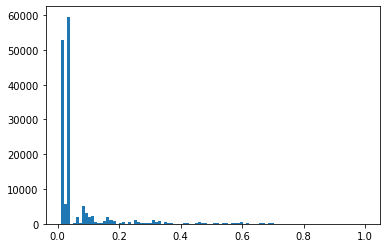

In [19]:
plt.hist(y_pred, bins=100)
plt.show()

In [20]:
f1_array = []
ths = np.linspace(0, 1, 100)
for th in ths:
    bin_score = (scores > th).astype(int)
    f1_array.append(f1_score(y_pred=bin_score, y_true=y_true))

In [21]:
ths[np.argmax(f1_array)]

0.19191919191919193

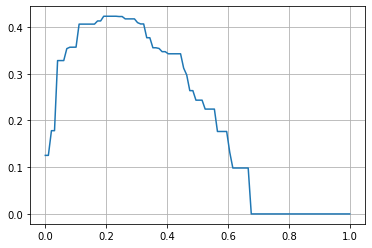

In [22]:
plt.plot(ths, f1_array)
plt.grid()
plt.show()

In [23]:
bin_score = (scores > 0.232).astype(int)

In [24]:
f1_score(y_pred=bin_score, y_true=y_true)

0.4231071008238525

## Смотрим на метрики

In [25]:
roc_auc_score(y_score=y_pred, y_true=y_true)

0.8127462073112316

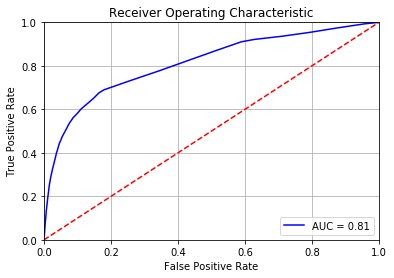

In [26]:
plot_roc_curve(y_pred=y_pred, y_true=y_true)